In [ ]:
import os
import numpy as np
import json
import pandas as pd
import datetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

%matplotlib inline

# Новый раздел

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/df_extended_v3.csv", index_col="match_id_hash")

In [ ]:
data.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,diff_gold_maxx,diff_xp_means,diff_xp_maxx,radiant_pred,dir_pred,diff_preds,radiant_strenth_balance,dire_strenth_balance,radiant_agility_balance,dire_agility_balance
match_id_hash,,,,,,,,,,,,,,,,,,,,,
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,1633.0,928.2,1041.0,0.0,0.0,0.0,0.2,0.2,0.6,0.2
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,80.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.4,0.6
19c39fe2af2b547e48708ca005c6ae74,160,22,7,0,0,57,0,0,0,1,...,367.0,85.8,81.0,1.0,0.0,1.0,0.4,0.4,0.2,0.4
c96d629dc0c39f0c616d1949938a6ba6,1016,22,0,1,0,119,0,3,3,5,...,529.0,-245.0,152.0,2.0,0.0,2.0,0.4,0.2,0.4,0.2
156c88bff4e9c4668b0f53df3d870f1b,582,22,7,2,2,12,3,1,2,9,...,-358.0,-110.8,-239.0,1.0,1.0,0.0,0.2,0.0,0.4,0.4


#### Это будет наш итоговый датасет

In [ ]:
SEED = 10801
sns.set_style(style="whitegrid")
plt.rcParams["figure.figsize"] = 8, 6
warnings.filterwarnings("ignore")

In [ ]:
df_train_features = pd.read_csv("/content/drive/MyDrive/train_data.csv", index_col="match_id_hash")
df_train_targets = pd.read_csv("/content/drive/MyDrive/train_targets.csv", index_col="match_id_hash")


In [ ]:
X = df_train_features.values
y = df_train_targets["radiant_win"].values.astype("int8")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=SEED)

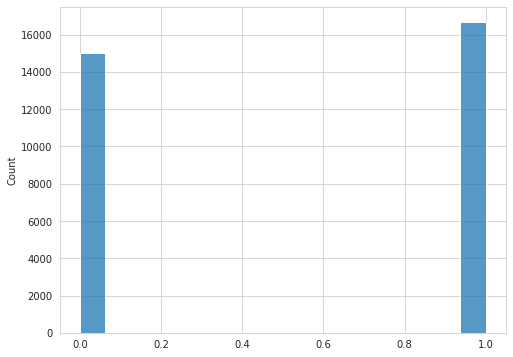

In [ ]:
sns.histplot(y)

Баланс классов хороший, не будем никак его менять

In [ ]:
%%time
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict_proba(X_valid)[:, 1]
valid_score = roc_auc_score(y_valid, y_pred)
print("ROC-AUC score на отложенной части:", valid_score)

ROC-AUC score на отложенной части: 0.7754387258058622
CPU times: user 29.8 s, sys: 84.2 ms, total: 29.9 s
Wall time: 15.6 s


#### Кросс-валидация

In [ ]:
%%time
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=SEED)
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc")
print(f"Среднее значение ROC-AUC на кросс-валидации: {cv_scores_rf.mean()}")

Среднее значение ROC-AUC на кросс-валидации: 0.7720210676055513
CPU times: user 7.34 s, sys: 549 ms, total: 7.89 s
Wall time: 1min 35s


In [ ]:
%%time
cv_scores_extended = cross_val_score(rf_model, data.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")
print(f"ROC-AUC на кросс-валидации для базовой модели: {cv_scores_rf.mean()}")

ROC-AUC на кросс-валидации для новых признаков: 0.8125309752637838
ROC-AUC на кросс-валидации для базовой модели: 0.7720210676055513
CPU times: user 636 ms, sys: 205 ms, total: 841 ms
Wall time: 1min 26s


#### Качество улучшилось, теперь почистим данные

In [ ]:
np.unique(data.dtypes)

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
data.columns.values[:5]

array(['game_time', 'game_mode', 'lobby_type', 'objectives_len',
       'chat_len'], dtype=object)

Эти признаки явно категориальные, хотя и закодированы числами. Остальные признаки это либо статистика на каждого игрока, либо мои добавленные признаки, которые все числовые, их так и оставим. Попробуем перекодировать категориальные признаки, вдруг это улучшит прогнозы. 

In [ ]:
#print(data.game_mode.value_counts(), data.lobby_type.value_counts(), data.chat_len.value_counts(), data.objectives_len.value_counts(), sep="/n")

In [ ]:
len(data.game_time.unique())

3314

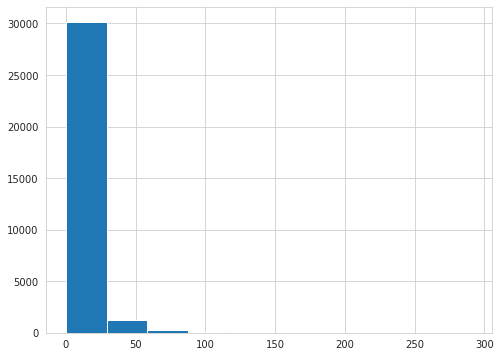

In [ ]:
data.chat_len.hist(bins=10)

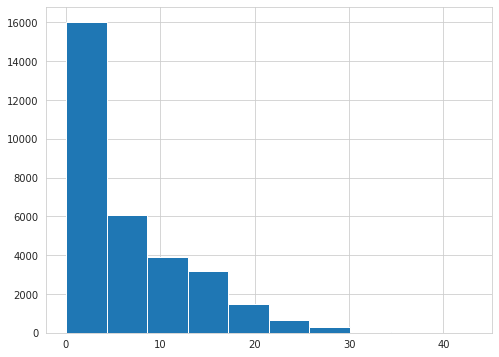

In [ ]:
data.objectives_len.hist()

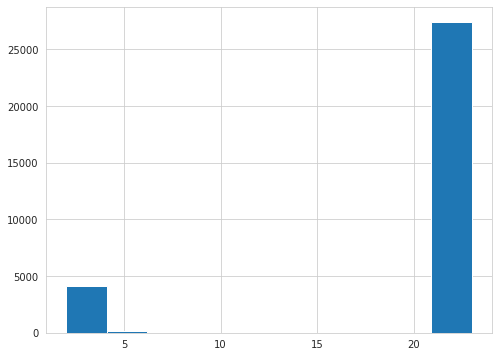

In [ ]:
data.game_mode.hist()

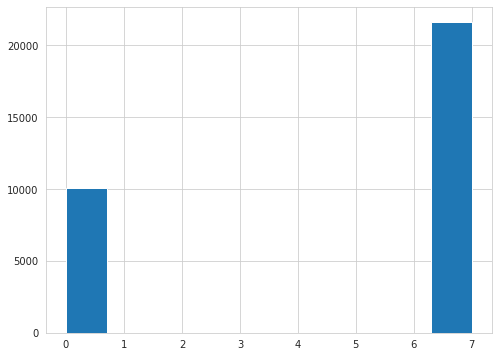

In [ ]:
data.lobby_type.hist()

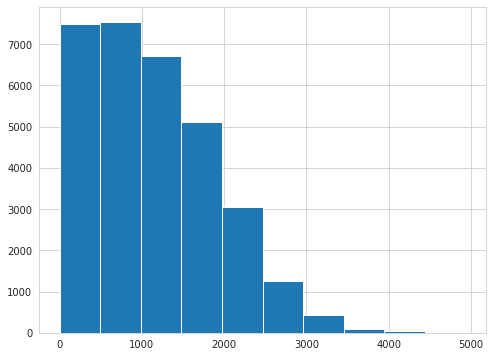

In [ ]:
data.game_time.hist()

Лобби можно перекодировать бинарной переменно 1/0. Длинну чата через бины сделать. Режим игры тоже разнообразием не блещет, сделаем его OHT, objectives len сделаем через бины. 

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (LabelEncoder, KBinsDiscretizer, OneHotEncoder)

In [ ]:
le = LabelEncoder()
lobby_type = le.fit_transform(data[["lobby_type"]])
lobby_type

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
bin = KBinsDiscretizer(n_bins=4)
objectives_len = bin.fit_transform(data[["objectives_len"]])
objectives_len.toarray()

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
ohe = OneHotEncoder()
game_mode = ohe.fit_transform(data[["game_mode"]])
game_mode.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# bin = KBinsDiscretizer(n_bins=2)
# game_mode = bin.fit_transform(data[["game_mode"]])
# game_mode.toarray()

In [ ]:
bin = KBinsDiscretizer(n_bins=10)
chat_len = bin.fit_transform(data[["chat_len"]])
chat_len.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
bin = KBinsDiscretizer(n_bins=20)
game_time = bin.fit_transform(data[["game_time"]])
game_time.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
time = pd.DataFrame(game_time.toarray(), columns=["interval"+str(i) for i in range(1, 21)])

In [ ]:
# chat = pd.DataFrame(chat_len.toarray(), columns=["chat"+str(i) for i in range(1, 9)])

In [ ]:
mode = pd.DataFrame(game_mode.toarray(), columns=["cat"+str(i) for i in range(1, 9)]) 

In [ ]:
objectives_len = pd.DataFrame(objectives_len.toarray(), columns=["len"+str(i) for i in range(1, 5)])

In [ ]:
lobby_type = pd.DataFrame(lobby_type, columns=["lobby_type"])

In [ ]:
data_obj = time.join([lobby_type, objectives_len, mode]) # выкинем длинну чата

In [ ]:
X_tran = np.hstack((data.drop(['game_time', 'game_mode', 'lobby_type', 'objectives_len', 'chat_len'], axis=1).values, data_obj.values))

In [ ]:
%%time
cv_scores_extended_tran = cross_val_score(rf_model, X_tran, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для новых трансформированных признаков: {cv_scores_extended_tran.mean()}")
print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")
print(f"ROC-AUC на кросс-валидации для базовой модели: {cv_scores_rf.mean()}")

ROC-AUC на кросс-валидации для новых трансформированных признаков: 0.8127872576589878
ROC-AUC на кросс-валидации для новых признаков: 0.8125309752637838
ROC-AUC на кросс-валидации для базовой модели: 0.7720210676055513
CPU times: user 583 ms, sys: 131 ms, total: 713 ms
Wall time: 1min 26s


Вариант без чата и с time=20 лучший, его и будем использовать
##### 0.8127872576589878

In [ ]:
names = list(data.drop(['game_time', 'game_mode', 'lobby_type', 'objectives_len', 'chat_len'], axis=1).columns) + list(data_obj.columns)

In [ ]:
data_trans = pd.DataFrame(X_tran, columns=[names])

#### Проведем feachure-selection

In [ ]:
X = data_trans.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=SEED)

In [ ]:
feat_labels = data_trans.columns
forest = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED) 
forest.fit(X_train, y_train) 
importances = forest.feature_importances_ 
indices = np.argsort(importances)[::-1] 
for f in range(X_train.shape[1]): 
  print("%2d) %-*s %f" % (f+1,30,
                          feat_labels[indices[f]], 
                          importances[indices[f]])) 

 1) ('diff_gold_means',)           0.162777
 2) ('diff_xp_means',)             0.146367
 3) ('diff_gold_maxx',)            0.082502
 4) ('diff_tower_kills',)          0.067540
 5) ('diff_creeps',)               0.052966
 6) ('diff_xp_maxx',)              0.051589
 7) ('dire_tower_kills',)          0.023442
 8) ('radiant_tower_kills',)       0.021501
 9) ('r3_y',)                      0.010297
10) ('d4_x',)                      0.010253
11) ('d2_y',)                      0.009689
12) ('r5_y',)                      0.009339
13) ('r1_y',)                      0.009294
14) ('d1_x',)                      0.009048
15) ('r5_x',)                      0.008747
16) ('r2_y',)                      0.008725
17) ('r4_y',)                      0.007397
18) ('d3_y',)                      0.007139
19) ('d5_y',)                      0.006940
20) ('d4_y',)                      0.006818
21) ('r3_x',)                      0.006751
22) ('r4_x',)                      0.006668
23) ('d3_x',)                   

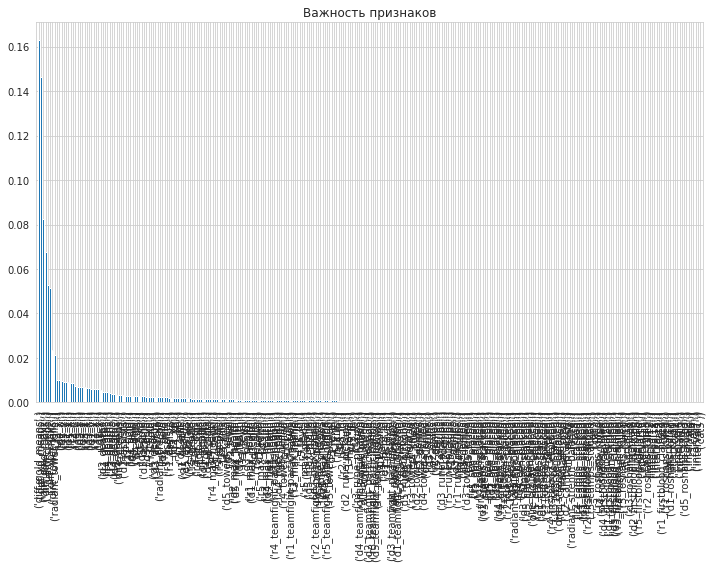

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Важность признаков') 
plt.bar(range(X_train.shape[1]), 
        importances[indices], 
        align='center') 
plt.xticks(range(X_train.shape[1]), 
                 feat_labels[indices], 
                 rotation=90) 
plt.xlim([-1, X_train.shape[1]]) 
plt.tight_layout() 
plt.show()

Построим модель на первых n-признаках

In [ ]:
data_red = data_trans[list(map(lambda x: feat_labels[x][0], indices[:200]))]

In [ ]:
%%time
cv_scores_extended_red = cross_val_score(rf_model, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для новых трансформированных признаков: {cv_scores_extended_tran.mean()}")
print(f"ROC-AUC на кросс-валидации для новых трансформированных признаков с редукцией: {cv_scores_extended_red.mean()}")
print(f"ROC-AUC на кросс-валидации для базовой модели: {cv_scores_rf.mean()}")

ROC-AUC на кросс-валидации для новых трансформированных признаков: 0.8127872576589878
ROC-AUC на кросс-валидации для новых трансформированных признаков с редукцией: 0.812967073891145
ROC-AUC на кросс-валидации для базовой модели: 0.7720210676055513
CPU times: user 560 ms, sys: 99.6 ms, total: 659 ms
Wall time: 1min 30s


##### 200 признаков - 0.812967073891145

In [ ]:
params = [50, 80, 100, 120, 150, 200, 220]
list_val = []
for val in params:
  data_red = data_trans[list(map(lambda x: feat_labels[x][0], indices[:val]))]
  cv_scores_extended_red = cross_val_score(rf_model, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
  list_val.append(cv_scores_extended_red.mean())
list_val

[0.8139845722446996,
 0.8138090851040598,
 0.8137699358365389,
 0.8135530593601841,
 0.8132279784358785,
 0.812967073891145,
 0.8123918936296912]

In [ ]:
%%time
data_red = data_trans[list(map(lambda x: feat_labels[x][0], indices[:50]))]
rf_model_best = RandomForestClassifier(n_estimators = 700, max_depth = 9, random_state=SEED)
cv_scores_extended_red = cross_val_score(rf_model_best, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для новых трансформированных признаков с редукцией: {cv_scores_extended_red.mean()}")

ROC-AUC на кросс-валидации для новых трансформированных признаков с редукцией: 0.8146143205913321
CPU times: user 1.07 s, sys: 196 ms, total: 1.27 s
Wall time: 2min 50s


In [ ]:
%%time
data_red = data_trans[list(map(lambda x: feat_labels[x][0], indices[:20]))]
rf_model_best = RandomForestClassifier(n_estimators = 700, max_depth = 9, random_state=SEED)
cv_scores_extended_red = cross_val_score(rf_model_best, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для новых трансформированных признаков с редукцией: {cv_scores_extended_red.mean()}")

ROC-AUC на кросс-валидации для новых трансформированных признаков с редукцией: 0.8140521985610052
CPU times: user 621 ms, sys: 82.8 ms, total: 703 ms
Wall time: 1min 40s


#### Теперь возьмем наши данные с 50 признаками и посмотрим, какой метод с ними справляется лучше всего. Две наилучших модели будем настраивать на наших данных - на редуцированных 50 и редуцированных 100

In [ ]:
import xgboost
import lightgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time
data_red = data_trans[list(map(lambda x: feat_labels[x][0], indices[:50]))]
rf_model = RandomForestClassifier(n_estimators = 300, 
                                  max_depth = 7, 
                                  random_state=SEED)
cv_RF_red = cross_val_score(rf_model, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
xgb = xgboost.XGBClassifier(random_state=SEED)
cv_xgb_red = cross_val_score(xgb, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
lgbm = lightgbm.LGBMClassifier(random_state=SEED)
cv_lgbm_red = cross_val_score(lgbm, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
dt = DecisionTreeClassifier(random_state=SEED, max_depth = 7)
cv_dt_red = cross_val_score(dt, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
lr = LogisticRegression(solver='liblinear', max_iter=10000)
cv_lr_red = cross_val_score(lr, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")
cv_knn_red = cross_val_score(knn, data_red.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)

CPU times: user 988 ms, sys: 215 ms, total: 1.2 s
Wall time: 2min 3s


In [ ]:
print(f"ROC-AUC для RF: {cv_RF_red.mean()}")
print(f"ROC-AUC для DT: {cv_dt_red.mean()}")
print(f"ROC-AUC для xgb: {cv_xgb_red.mean()}")
print(f"ROC-AUC для lgbm: {cv_lgbm_red.mean()}")
print(f"ROC-AUC для LR: {cv_lr_red.mean()}")
print(f"ROC-AUC для knn: {cv_knn_red.mean()}")

ROC-AUC для RF: 0.8139845722446996
ROC-AUC для DT: 0.7919810929810018
ROC-AUC для xgb: 0.8139172307390131
ROC-AUC для lgbm: 0.811091663681424
ROC-AUC для LR: 0.807298254502079
ROC-AUC для knn: 0.7551331249301304


Теперь будем работать с RandomForest и XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
rf_model = RandomForestClassifier(random_state=SEED)
params = {'n_estimators': [500, 700], 'max_depth': range(9, 15)}
cv_model = GridSearchCV(rf_model, params, n_jobs=-1, scoring="roc_auc", cv=cv)
cv_model.fit(data_red.values, y)
cv_model.best_estimator_

CPU times: user 1min 21s, sys: 1.54 s, total: 1min 22s
Wall time: 35min 35s


In [ ]:
cv_model.best_score_, cv_model.best_estimator_

(0.8147670607810044,
 RandomForestClassifier(max_depth=10, n_estimators=700, random_state=10801))

In [ ]:
%%time
xgb = xgboost.XGBClassifier(random_state=SEED)
params = {'eta': [0.1, 0.2], 'max_depth': range(7, 13)}
gs_xgb = GridSearchCV(xgb, params, n_jobs=-1, scoring="roc_auc", cv=cv)
gs_xgb.fit(data_red.values, y)
gs_xgb.best_estimator_, gs_xgb.best_score_

CPU times: user 22.9 s, sys: 736 ms, total: 23.6 s
Wall time: 15min 21s


In [ ]:
gs_xgb.best_estimator_, gs_xgb.best_score_

(XGBClassifier(eta=0.1, max_depth=7, random_state=10801), 0.8095804127356196)

In [ ]:
xgb = xgboost.XGBClassifier(eta=0.1, random_state=SEED)
cv_xgb_red = cross_val_score(xgb, data_trans.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(cv_xgb_red.mean())

0.8147041219075402


In [ ]:
# data_trans.to_csv("data_v4.csv")